# Wait Wait, Don't Analyze Me!

![NPR logo](https://media.npr.org/branding/programs/wait-wait-dont-tell-me/branding_main-c5920a167d6a5d445ce86fac30b90454223b6b57.png "One nerd's attempt to learn everything there is to know about NPR's greatest quiz show.")


# Introduction
[Wait Wait, Don't Tell Me!](https://www.npr.org/programs/wait-wait-dont-tell-me/) is NPR's longest-running news quiz show. Contestents call in to answer questions about the week's news, and a rotating cast of three panelists make jokes and parody newsworthy (and not-so-newsworthy) current events. Listening to "Wait wait" has been a highlight of my week since I was a kid, and it remains one of NPR's most popular segments. So what better way to show my appreciation than to take it apart and see what makes it tick?

For this project, I have pulled text transcripts of each episode of "Wait, Wait", storing them as a MySQL library. I have two goals:
1. Understand and predict jokes in the program.
2. Create a "Wait wait" transcript generator, so that I don't have to wait a whole week between episodes!

# Section 0: Loading the data

Before I can analyze the data, I must first load it and process it. To accomplish this, I wrote a simple function to load in text files containing the transcripts, figure out who the speakers are, and separate the text blocks into a list of words.

In [19]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import keras

%matplotlib inline

# change the default font size in figures to be larger
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

In [2]:
# function to load and process one text files
def Load_Transcript(filename):
    # Load the file
    f_in = open(filename,'r')
    transcript = f_in.read()
    f_in.close

    # split the text into words
    words = transcript.split()
    while not words[0][-1] == ':':
        words = words[1:]
    
    # Iterate through all of the words, and find those that correspond to speakers
    names = set([x for x in words if x[-1]==':']) 
    return words, names,transcript

In [3]:
data_dir = './datasets/'
files = os.listdir(data_dir)
files = files[1:]

# Section 1: Understanding jokes

### 1.1 Who is the funniest panelist? 

The first question I address is which panelist is the funniest. I'm aided in this process by the fact that laughter is marked in the transcripts, with the label "(LAUGHTER)". Thus, I can look at every laugh, and figure out who caused it. But people who talk more are likely to get more laughs than those who don't talk much, on average. So, I will calculate the "**Laugh rate**," defined as the number of laughs each speaker gets per hundred words they speak. I will save my results in a pandas table.

In [4]:
# generate an empty pandas dataframe to keep track of the results
df = pd.DataFrame(index=[], columns=['num_words','num_laughs','num_claps'])
df = df.fillna(0)

# for each transcript, count the words spoken and the number of laughs
for file in files:
    words, names,_ = Load_Transcript(data_dir+file)
    # Count the number of words each person says, and the number of laughs they receive
    for word in words:
        # note each time the speaker changes
        if word in names:
            speaker = word
            if speaker == 'HOST:': # Peter Sagal is sometimes referred to as "Host"
                speaker = 'SAGAL:'
            if speaker not in df.index: # add a row if we haven't seen this speaker before
                df.loc[speaker,:] = 0
            continue
        
        # count laughs
        if 'LAUGHTER' in word:
            df.loc[speaker,'num_laughs'] +=1
            continue
        
        # count applause
        if 'APPLAUSE' in word:
            df.loc[speaker,'num_claps'] +=1
            continue
        
        # count total words
        df.loc[speaker,'num_words'] +=1

# remove the speakers with less than 100 words (call-in guests and the like)
df = df[df['num_words'] > 100]

In [5]:
# Now divide the number of laughs by the number of words to get the laugh rate (laughs per hundred words)
df['laugh_rate'] = 100*df['num_laughs']/df['num_words']
df['clap_rate'] = 100*df['num_claps']/df['num_words']
df.sort_values('laugh_rate',ascending=False)

,num_words,num_laughs,num_claps,laugh_rate,clap_rate
HONG:,433.0,15.0,2.0,3.464203,0.461894
KLEIN:,617.0,15.0,3.0,2.431118,0.486224
BURBANK:,712.0,16.0,2.0,2.247191,0.280899
POUNDSTONE:,770.0,17.0,1.0,2.207792,0.129870
SALIE:,602.0,11.0,3.0,1.827243,0.498339
SAGAL:,9330.0,159.0,33.0,1.704180,0.353698
BODETT:,523.0,8.0,2.0,1.529637,0.382409
SORKIN:,727.0,10.0,1.0,1.375516,0.137552
HAWK:,608.0,8.0,3.0,1.315789,0.493421
KURTIS:,803.0,6.0,6.0,0.747198,0.747198


/Users/coraames/git/BimanualModeling/py_36_env/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


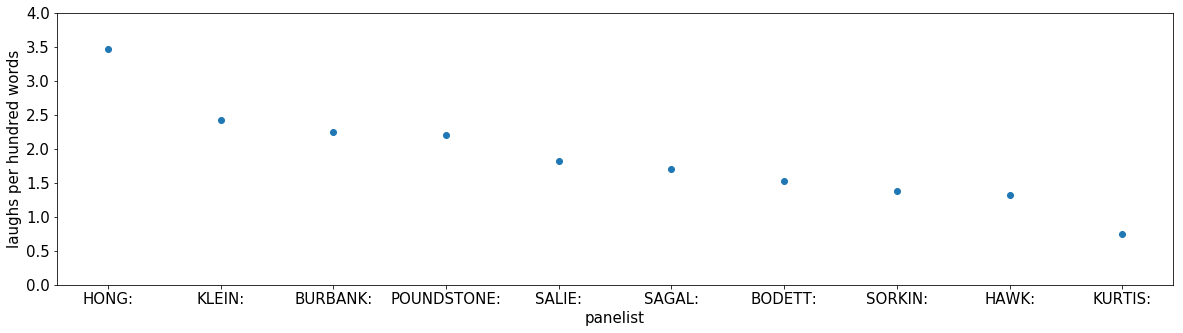

In [28]:
plt.figure(figsize=(20,5));
plt.plot(df.sort_values('laugh_rate',ascending=False).laugh_rate,'o');
plt.xlabel('panelist');
plt.ylim([0,np.ceil(df.laugh_rate.max())])
plt.ylabel('laughs per hundred words');

### Conclusions, further questions
It looks like our winner is Helen Hong! With 3.5 laughs per hundred words, Hong leaves runner-up Jessi Klein in the dust. 
Looking at our data table, we can also see that Helen Hong has fewer total words spoken than others. Alternatively, if we have fewer samples that might tend to lead to noisier estimates for the people who talk less, leading them to have more variance in the estimate of "funniness." Might how much a person talks be negatively related to funniness? Or do shorter digressions tend to be funnier? What other properties can predict laughter?

### Questions to address:
1. What are the funniest words? 
    - Examine the words that precede laughs, look for trends.
    - Weight by word frequency in whole show. (percent of time the word elicited a laugh)
    - Eliminate "common" words (the, and, ...)
2. Build a laugh predictor:
    - Based on a set of words
    - RNN
    - Markov model?

### 1.2 What are the funniest words?

In our quest to predict laughter, one reasonable thing to consider is which words or phrases tend to precede laughs. Are there any major trends in these words? To do this, I will count all of the words that precede laughter, and compare it with total word counts.

In [ ]:
# Store the data in a dictionary
all_words = {}
funny_words = {}



# How is laughter distributed through a show?

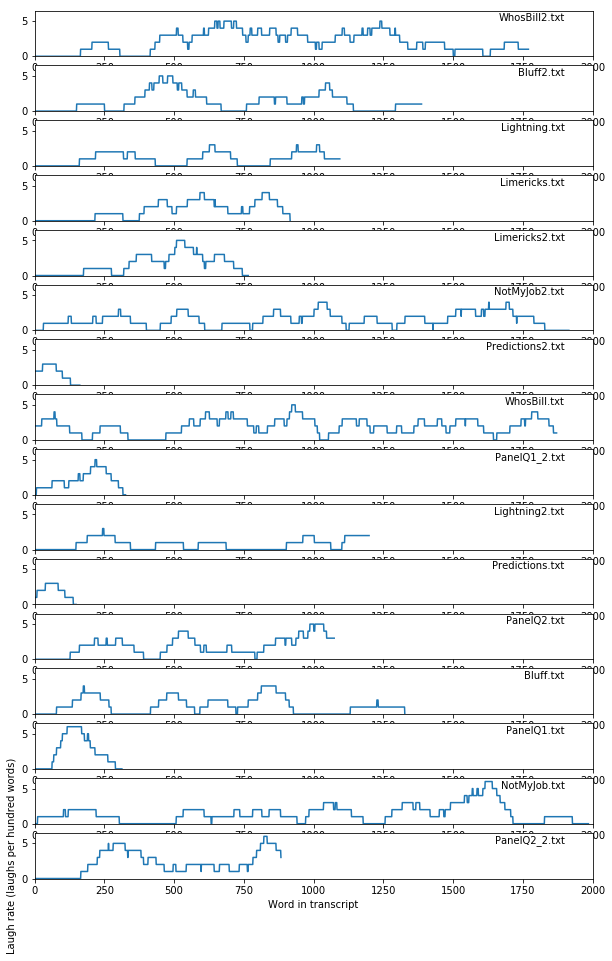

In [41]:
plt.figure(figsize=(10,20))
for file_idx,file in zip(range(len(files)),files):
    words, names,transcript = Load_Transcript(data_dir+file)
    
    # note where in the transcript laughs occured
    laughs = np.zeros(len(words))
    speaker_change = np.zeros(len(words))
    for word_idx, word in zip(range(len(words)), words):
        if 'LAUGHTER' in word:
            laughs[word_idx] = 1
    plt.subplot(20,1,file_idx+1)
    plt.plot(np.convolve(laughs,np.ones(100),mode='same'))
    plt.xlim([0,2000])
    plt.ylim([0, 6.5])
    plt.text(1900,5,file,ha='right')

plt.xlabel('Word in transcript');
plt.ylabel('Laugh rate (laughs per hundred words)');

# Can we create our own Wait Wait Don't Tell Me content?

In [9]:
# Load all of the transcripts
transcript_list = []
chars = set()
for file in files:
    _,_,transcript = Load_Transcript(data_dir+file)
    transcript_list.append(transcript)


In [10]:
# build a tokenizer to convert the words to integers
vocab_size = 10000
tokenizer = keras.preprocessing.text.Tokenizer(num_words=vocab_size, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=' ')
tokenizer.fit_on_texts(transcript_list)
encoded_transcripts = tokenizer.texts_to_sequences(transcript_list)

In [250]:
help(tokenizer.sequences_to_texts)

Help on method sequences_to_texts_generator in module keras_preprocessing.text:

sequences_to_texts_generator(sequences) method of keras_preprocessing.text.Tokenizer instance
    Transforms each sequence in `sequences` to a list of texts(strings).
    
    Each sequence has to a list of integers.
    In other words, sequences should be a list of sequences
    
    Only top "num_words" most frequent words will be taken into account.
    Only words known by the tokenizer will be taken into account.
    
    # Arguments
        texts: A list of sequences.
    
    # Yields
        Yields individual texts.



In [14]:
tokenizer.sequences_to_texts([encoded_transcripts[1]])

["bill kurtis from npr and wbez chicago this is wait wait don't tell me the npr news quiz cheering kurtis i'm bill kurtis we're playing this week with jessi klein helen hong and luke burbank and here again is your host at the san diego civic theatre in san diego calif peter sagal peter sagal host thank you bill thank you everybody cheering sagal right now it is time for the wait wait don't tell me bluff the listener game call 1 888 wait wait to play our game on the air hi you are on wait wait don't tell me carrie phillips hi peter this is carrie phillips and i'm calling from corvallis ore sagal oh corvallis it's beautiful up there cheering phillips yes it is sagal what do you do up there phillips well i'm fairly recently retired and so i spend most of my time doing all those things you don't have time for when you work sagal there you go what sort of things are you spending your time doing now that you don't have to work phillips hiking paddling road trips doing the crossword puzzle yo

In [15]:
# split up the model
train_len = 50
x = []
y = []
for transcript in encoded_transcripts:
    for word in range(0,len(transcript)-train_len-1,3):
        x.append(transcript[word:word+train_len])
        y.append(transcript[word+train_len+1])
x = np.array(x)
y = np.array(y)

from keras.utils import to_categorical
y_binary = to_categorical(y,num_classes=vocab_size)

In [39]:
# build the model
model = keras.Sequential()
model.add(Embedding(vocab_size, 28, input_length=train_len))
model.add(GRU(128))
model.add(Dense(vocab_size, activation='softmax'))

optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 50, 28)            280000    
_________________________________________________________________
dense_6 (Dense)              (None, 50, 10000)         290000    
Total params: 570,000
Trainable params: 570,000
Non-trainable params: 0
_________________________________________________________________


In [40]:
# print_callback = LambdaCallback(on_epoch_end=on_epoch_end
history = model.fit(x, y_binary,
              batch_size=128,
              epochs=5,
              validation_split=.1,
              shuffle = True,
    #           callbacks=[on_epoch_end]
             )

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

ValueError: Error when checking target: expected dense_6 to have 3 dimensions, but got array with shape (5467, 10000)

In [18]:
from numpy import random
import sys

In [26]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(len(x))
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)
        
        
        generated_decoded = ''
        sentence = x[start_index]
        generated_encoded = sentence
        generated_decoded += tokenizer.sequences_to_texts([sentence])[0]
        print('----- Generating with seed: "' + generated + '"')

        for i in range(400):
            x_pred = generated_encoded[-train_len:]
            
            preds = model.predict(x_pred, verbose=0)[0]
            
            next_index = sample(preds, diversity)
            next_char = num_to_char[next_index]

            generated += next_char
            sentence = generated[-train_len:]

        print(generated)


In [21]:
generated_decoded = ''
sentence = x[10]
generated_encoded = sentence
generated_decoded += tokenizer.sequences_to_texts([sentence])[0]
print('----- Generating with seed: "' + generated + '"')


for i in range(400):
    x_pred = generated_encoded[-train_len:]
    preds = model.predict(x_pred, verbose=0)


NameError: name 'generated' is not defined

In [23]:
x_pred = generated_encoded[-train_len:]
x_pred.shape

(50,)

In [24]:
model.predict(x_pred)

ValueError: Error when checking input: expected embedding_1_input to have shape (50,) but got array with shape (1,)

In [279]:
x

array([[  50,   41,   42, ...,  106,    7,   50],
       [ 139,    6,  340, ...,  193,    2,  106],
       [ 178,   17,   11, ...,    7,  194,  195],
       ...,
       [  16,    1, 2892, ...,    8,   57,   33],
       [   5,    1, 1176, ...,   78,   12,   24],
       [2893, 2894,    8, ...,  280, 2896, 1162]])